In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ordinaryLeastSquares import ols2D
import ordinaryLeastSquares
import findStat
from matplotlib.tri import Triangulation
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

# Franke Function

In [2]:
def Franke(x1, x2):
    a = 0.75*np.exp(-((9*x1-2)**2)/4-((9*x2-2)**2)/4)
    b = 0.75*np.exp(-((9*x1+1)**2)/49-((9*x2+1)**2)/10)
    c = 0.5*np.exp(-((9*x1-7)**2)/4-((9*x2-3)**2)/4)
    d = 0.2*np.exp(-((9*x1-4)**2)-((9*x2-7)**2))
    return a+b+c-d

# Unit tests

# Testing OLS on one set of values generated from noiseless output

In [3]:
n = 100
x1 = np.linspace(0,1,n)
x2 = np.linspace(0,1,n)
xx1, xx2 = np.meshgrid(x1, x2)
xx1 = xx1.reshape((n*n),1)
xx2 = xx2.reshape((n*n),1)
y = Franke(xx1, xx2)
trainMSE, testMSE, trainR2, testR2 = ordinaryLeastSquares.ols2D(x1=xx1, x2=xx2, y=y, order=5, test_ratio=0.2)
"""
t = ordinaryLeastSquares.ols2D(x1=xx1, x2=xx2, y=y, order=5, test_ratio=0.2)
y_train = t[0]
y_test = t[1]
y_model_train = t[2]
y_model_test = t[3]
trainMSE = findStat.findMSE(y_train, y_model_train)
testMSE = findStat.findMSE(y_test, y_model_test)
trainR2 = findStat.findR2(y_train, y_model_train)
testR2 = findStat.findR2(y_test, y_model_test)
"""
print(trainMSE)
print(testMSE)
print(trainR2)
print(testR2)

0.0021060851667444205
0.0020594031533278513
0.9747234783395814
0.9751208691308979


# Testing OLS on one set of values of noisy data output

In [4]:
y = Franke(xx1, xx2)
y += np.random.normal(0, 0.1, size = y.shape)
#t = ordinaryLeastSquares.ols2D(x1=xx1, x2=xx2, y=y, order=5, test_ratio=0.2)
trainMSE, testMSE, trainR2, testR2 = ordinaryLeastSquares.ols2D(x1=xx1, x2=xx2, y=y, order=5, test_ratio=0.2)
"""
y_train = t[0]
y_test = t[1]
y_model_train = t[2]
y_model_test = t[3]
trainMSE = findStat.findMSE(y_train, y_model_train)
testMSE = findStat.findMSE(y_test, y_model_test)
trainR2 = findStat.findR2(y_train, y_model_train)
testR2 = findStat.findR2(y_test, y_model_test)
"""


print(trainMSE)
print(testMSE)
print(trainR2)
print(testR2)

0.012189185293082971
0.011802376592046216
0.8685677823547135
0.8693575592031078


# Performing OLS for varying model complexity, data size, noise, test ratio
For parameters:

1. polynomial order $p$ is the model complexity. We test our code for 2D polynomials of order $p = 1,2,3,4,5$
2. data size $n$ is the number of points we divide each axis into to find our data. We test for n = 100, 500, 1000, 5000, 10000
3. noise variance $\sigma$ is the variance of the zero mean gaussian noise we add to the output data
4. test ratio $r$ is the ratio with which we partition the data into training and testing set. We use $r = 0.0, 0.1, 0.2, 0.3, 0.4, 0.5$

For each combination of $(p, n, \sigma, r)$ we get output $MSE_train, MSE_test, R2_train, R2_test $

In [28]:
p = np.arange(1,6)
n = np.array([100, 300])#, 1000, 3000])
noise = np.array([0.0, 0.025, 0.05, 0.075, 0.1])
r = np.arange(1,5)*0.2

train_MSE_arr = np.zeros([len(p), len(n), len(noise), len(r)])
test_MSE_arr = np.zeros([len(p), len(n), len(noise), len(r)])
train_R2_arr = np.zeros([len(p), len(n), len(noise), len(r)])
test_R2_arr = np.zeros([len(p), len(n), len(noise), len(r)])


#below function is unused for now. 
def findmyStats(OLS_out):
    #find stats based on OLS output
    y_train = OLS_out[0]
    y_test = OLS_out[1]
    y_model_train = OLS_out[2]
    y_model_test = OLS_out[3]
    trainMSE = findStat.findMSE(y_train, y_model_train)
    testMSE = findStat.findMSE(y_test, y_model_test)
    trainR2 = findStat.findR2(y_train, y_model_train)
    testR2 = findStat.findR2(y_test, y_model_test)
    
    return trainMSE, testMSE, trainR2, testR2

In [29]:
for i in range(len(p)):
    for j in range(len(n)):
        for k in range(len(noise)):
            for l in range(len(r)):
                x1 = np.linspace(0,1,n[j])
                x2 = np.linspace(0,1,n[j])
                xx1, xx2 = np.meshgrid(x1, x2)
                xx1 = xx1.reshape((n[j]*n[j]),1)
                xx2 = xx2.reshape((n[j]*n[j]),1)
                y = Franke(xx1, xx2)
                y += np.random.normal(0, noise[k], size = y.shape)
                
                t = ordinaryLeastSquares.ols2D(x1=xx1, x2=xx2, y=y, order=p[i], test_ratio=r[l])
                train_MSE_arr[i,j,k,l] = t[0]
                test_MSE_arr[i,j,k,l] = t[1]
                train_R2_arr[i,j,k,l] = t[2]
                test_R2_arr[i,j,k,l] = t[3]

# Comparison Plots

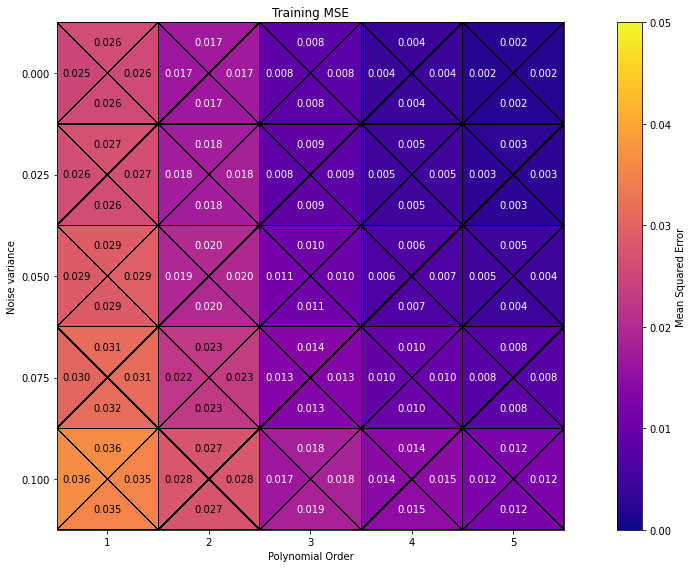

In [30]:
M = len(p)
N = len(noise)

# this plot is based on stackover flow answer by user JohanC to the question in the link 
# https://stackoverflow.com/questions/66048529/how-to-create-a-heatmap-where-each-cell-is-divided-into-4-triangles
def triangulation_for_triheatmap(M, N):
    xv, yv = np.meshgrid(np.arange(-0.5, M), np.arange(-0.5, N))  # vertices of the little squares
    xc, yc = np.meshgrid(np.arange(0, M), np.arange(0, N))  # centers of the little squares
    x = np.concatenate([xv.ravel(), xc.ravel()])
    y = np.concatenate([yv.ravel(), yc.ravel()])
    cstart = (M + 1) * (N + 1)  # indices of the centers

    trianglesN = [(i + j * (M + 1), i + 1 + j * (M + 1), cstart + i + j * M)
                  for j in range(N) for i in range(M)]
    trianglesE = [(i + 1 + j * (M + 1), i + 1 + (j + 1) * (M + 1), cstart + i + j * M)
                  for j in range(N) for i in range(M)]
    trianglesS = [(i + 1 + (j + 1) * (M + 1), i + (j + 1) * (M + 1), cstart + i + j * M)
                  for j in range(N) for i in range(M)]
    trianglesW = [(i + (j + 1) * (M + 1), i + j * (M + 1), cstart + i + j * M)
                  for j in range(N) for i in range(M)]
    return [Triangulation(x, y, triangles) for triangles in [trianglesN, trianglesE, trianglesS, trianglesW]]

values = [np.transpose(train_MSE_arr[:, 0, : , 0]), np.transpose(train_MSE_arr[:, 0, : , 1]),
          np.transpose(train_MSE_arr[:, 0, : , 2]), np.transpose(train_MSE_arr[:, 0, : , 3])]

triangul = triangulation_for_triheatmap(M, N)
cmaps = ['Blues','Blues','Blues','Blues']#['Blues', 'Greens', 'Purples', 'Reds']  # ['winter', 'spring', 'summer', 'autumn']
norms = [plt.Normalize(-0.5, 1) for _ in range(4)]
fig, ax = plt.subplots(figsize=(15,8))
#imgs = [ax.tripcolor(t, np.ravel(val), cmap=cmap, norm=norm, ec='white')
#        for t, val, cmap, norm in zip(triangul, values*100, cmaps, norms)]
imgs = [ax.tripcolor(t, val.ravel(), cmap='plasma', vmin=0, vmax=0.05, ec='k')
        for t, val in zip(triangul, (values))]
for val, dir in zip(values, [(-1, 0), (0, 1), (1, 0), (0, -1)]):
    for i in range(M):
        for j in range(N):
            v = val[j, i]
            ax.text(i + 0.3 * dir[1], j + 0.3 * dir[0], f'{v:.3f}', color='k' if 0.02 < v < 0.2 else 'w', ha='center', va='center')
ax.set_xticks(range(M))
ax.set_yticks(range(N))

def ymajor_tick(x, pos):
    return f"{x*0.025:.3f}"
def xmajor_tick(x, pos):
    return f"{x+1}"

ax.yaxis.set_major_locator(MultipleLocator(1.000))
# FuncFormatter is created and used automatically
ax.yaxis.set_major_formatter(ymajor_tick)

ax.xaxis.set_major_formatter(xmajor_tick)

ax.invert_yaxis()
ax.margins(x=0, y=0)
ax.set_xlabel("Polynomial Order")
ax.set_ylabel("Noise variance")

ax.set_aspect('equal', 'box')  # square cells
cbar = fig.colorbar(imgs[0], ax=ax, label = "Mean Squared Error")
ax.set_title("Training MSE")
plt.tight_layout()
plt.show()

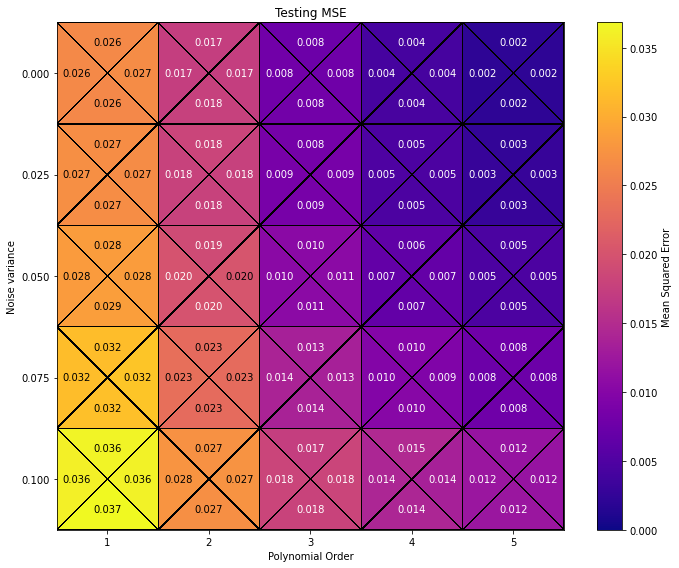

In [31]:
values = [np.transpose(test_MSE_arr[:, 0, : , 0]), np.transpose(test_MSE_arr[:, 0, : , 1]),
          np.transpose(test_MSE_arr[:, 0, : , 2]), np.transpose(test_MSE_arr[:, 0, : , 3])]

triangul = triangulation_for_triheatmap(M, N)
cmaps = ['Blues','Blues','Blues','Blues']#['Blues', 'Greens', 'Purples', 'Reds']  # ['winter', 'spring', 'summer', 'autumn']
norms = [plt.Normalize(-0.5, 1) for _ in range(4)]
fig, ax = plt.subplots(figsize=(10,8))
#imgs = [ax.tripcolor(t, np.ravel(val), cmap=cmap, norm=norm, ec='white')
#        for t, val, cmap, norm in zip(triangul, values*100, cmaps, norms)]
imgs = [ax.tripcolor(t, val.ravel(), cmap='plasma', vmin=0, vmax=np.max(np.max(values)), ec='k')
        for t, val in zip(triangul, (values))]
for val, dir in zip(values, [(-1, 0), (0, 1), (1, 0), (0, -1)]):
    for i in range(M):
        for j in range(N):
            v = val[j, i]
            ax.text(i + 0.3 * dir[1], j + 0.3 * dir[0], f'{v:.3f}', color='k' if 0.02 < v < 0.2 else 'w', ha='center', va='center')
ax.set_xticks(range(M))
ax.set_yticks(range(N))

def ymajor_tick(x, pos):
    return f"{x*0.025:.3f}"
def xmajor_tick(x, pos):
    return f"{x+1}"

ax.yaxis.set_major_locator(MultipleLocator(1.000))
# FuncFormatter is created and used automatically
ax.yaxis.set_major_formatter(ymajor_tick)

ax.xaxis.set_major_formatter(xmajor_tick)

ax.invert_yaxis()
ax.margins(x=0, y=0)
ax.set_xlabel("Polynomial Order")
ax.set_ylabel("Noise variance")

ax.set_aspect('equal', 'box')  # square cells
cbar = fig.colorbar(imgs[0], ax=ax, label = "Mean Squared Error")
ax.set_title("Testing MSE")
plt.tight_layout()
plt.show()




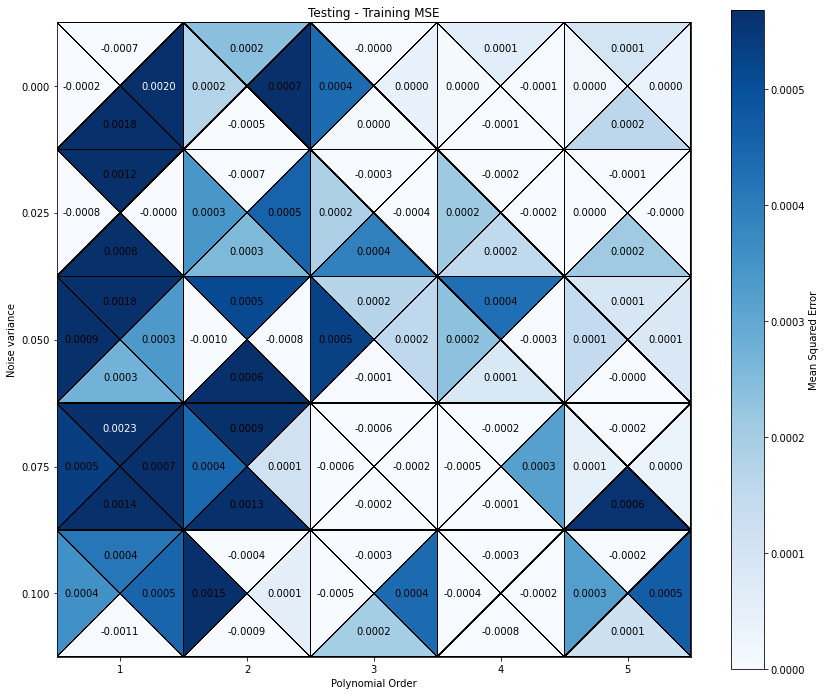

In [9]:
values = [-np.transpose(train_MSE_arr[:, 0, : , 0]-test_MSE_arr[:, 0, : , 0]), 
          -np.transpose(train_MSE_arr[:, 0, : , 1]-test_MSE_arr[:, 0, : , 1]),
          -np.transpose(train_MSE_arr[:, 0, : , 2]-test_MSE_arr[:, 0, : , 2]), 
          -np.transpose(train_MSE_arr[:, 0, : , 3]-test_MSE_arr[:, 0, : , 3])]

triangul = triangulation_for_triheatmap(M, N)
cmaps = ['Blues','Blues','Blues','Blues']#['Blues', 'Greens', 'Purples', 'Reds']  # ['winter', 'spring', 'summer', 'autumn']
norms = [plt.Normalize(-0.5, 1) for _ in range(4)]
fig, ax = plt.subplots(figsize=(12,10))
#imgs = [ax.tripcolor(t, np.ravel(val), cmap=cmap, norm=norm, ec='white')
#        for t, val, cmap, norm in zip(triangul, values*100, cmaps, norms)]
imgs = [ax.tripcolor(t, val.ravel(), cmap='Blues', vmin=0, vmax=np.max(np.max(values))/4, ec='k')
        for t, val in zip(triangul, (values))]
for val, dir in zip(values, [(-1, 0), (0, 1), (1, 0), (0, -1)]):
    for i in range(M):
        for j in range(N):
            v = val[j, i]
            ax.text(i + 0.3 * dir[1], j + 0.3 * dir[0], f'{v:.4f}', color='w' if 0.002 < v < 0.02 else 'k', ha='center', va='center')
ax.set_xticks(range(M))
ax.set_yticks(range(N))

def ymajor_tick(x, pos):
    return f"{x*0.025:.3f}"
def xmajor_tick(x, pos):
    return f"{x+1}"

ax.yaxis.set_major_locator(MultipleLocator(1.000))
# FuncFormatter is created and used automatically
ax.yaxis.set_major_formatter(ymajor_tick)

ax.xaxis.set_major_formatter(xmajor_tick)

ax.invert_yaxis()
ax.margins(x=0, y=0)
ax.set_xlabel("Polynomial Order")
ax.set_ylabel("Noise variance")

ax.set_aspect('equal', 'box')  # square cells
cbar = fig.colorbar(imgs[0], ax=ax, label = "Mean Squared Error")
ax.set_title("Testing - Training MSE")
plt.tight_layout()
plt.show()




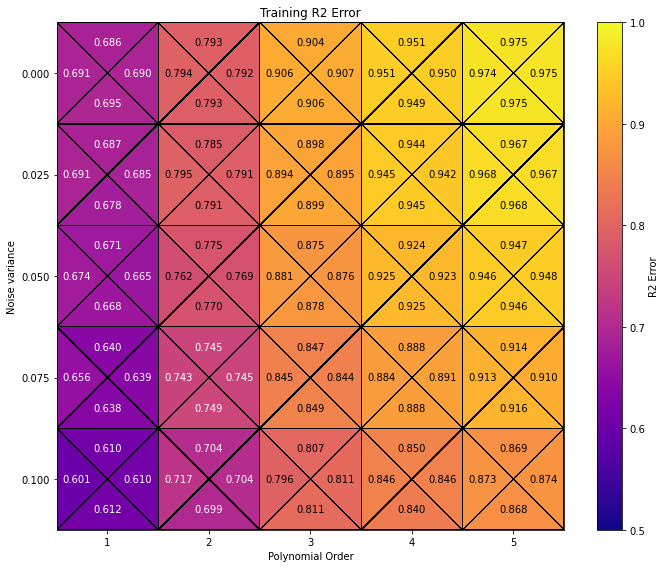

In [10]:
values = [np.transpose(train_R2_arr[:, 0, : , 0]), np.transpose(train_R2_arr[:, 0, : , 1]),
          np.transpose(train_R2_arr[:, 0, : , 2]), np.transpose(train_R2_arr[:, 0, : , 3])]

triangul = triangulation_for_triheatmap(M, N)
cmaps = ['Blues','Blues','Blues','Blues']#['Blues', 'Greens', 'Purples', 'Reds']  # ['winter', 'spring', 'summer', 'autumn']
norms = [plt.Normalize(-0.5, 1) for _ in range(4)]
fig, ax = plt.subplots(figsize=(10,8))
#imgs = [ax.tripcolor(t, np.ravel(val), cmap=cmap, norm=norm, ec='white')
#        for t, val, cmap, norm in zip(triangul, values*100, cmaps, norms)]
imgs = [ax.tripcolor(t, val.ravel(), cmap='plasma', vmin=0.5, vmax=1.0, ec='k')
        for t, val in zip(triangul, (values))]
for val, dir in zip(values, [(-1, 0), (0, 1), (1, 0), (0, -1)]):
    for i in range(M):
        for j in range(N):
            v = val[j, i]
            ax.text(i + 0.3 * dir[1], j + 0.3 * dir[0], f'{v:.3f}', color='w' if 0.0 < v < 0.75 else 'k', ha='center', va='center')
ax.set_xticks(range(M))
ax.set_yticks(range(N))

def ymajor_tick(x, pos):
    return f"{x*0.025:.3f}"
def xmajor_tick(x, pos):
    return f"{x+1}"

ax.yaxis.set_major_locator(MultipleLocator(1.000))
# FuncFormatter is created and used automatically
ax.yaxis.set_major_formatter(ymajor_tick)

ax.xaxis.set_major_formatter(xmajor_tick)

ax.invert_yaxis()
ax.margins(x=0, y=0)
ax.set_xlabel("Polynomial Order")
ax.set_ylabel("Noise variance")

ax.set_aspect('equal', 'box')  # square cells
cbar = fig.colorbar(imgs[0], ax=ax, label = "R2 Error")
ax.set_title("Training R2 Error")
plt.tight_layout()
plt.show()

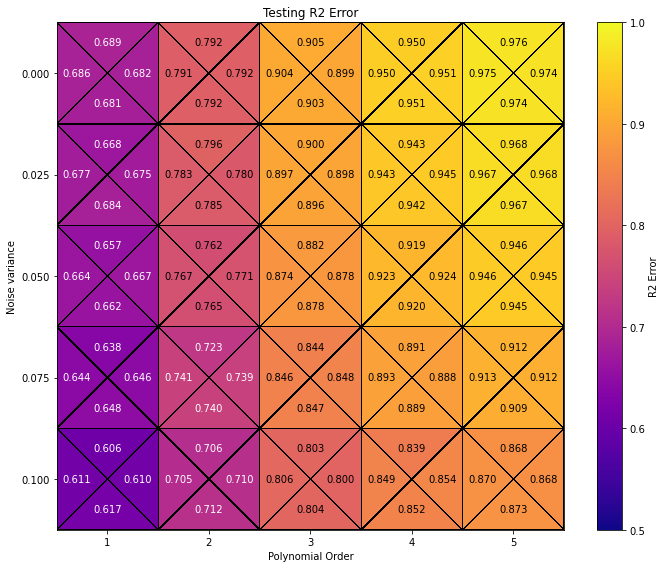

In [11]:
values = [np.transpose(test_R2_arr[:, 0, : , 0]), np.transpose(test_R2_arr[:, 0, : , 1]),
          np.transpose(test_R2_arr[:, 0, : , 2]), np.transpose(test_R2_arr[:, 0, : , 3])]

triangul = triangulation_for_triheatmap(M, N)
cmaps = ['Blues','Blues','Blues','Blues']#['Blues', 'Greens', 'Purples', 'Reds']  # ['winter', 'spring', 'summer', 'autumn']
norms = [plt.Normalize(-0.5, 1) for _ in range(4)]
fig, ax = plt.subplots(figsize=(10,8))
#imgs = [ax.tripcolor(t, np.ravel(val), cmap=cmap, norm=norm, ec='white')
#        for t, val, cmap, norm in zip(triangul, values*100, cmaps, norms)]
imgs = [ax.tripcolor(t, val.ravel(), cmap='plasma', vmin=0.5, vmax=1.0, ec='k')
        for t, val in zip(triangul, (values))]
for val, dir in zip(values, [(-1, 0), (0, 1), (1, 0), (0, -1)]):
    for i in range(M):
        for j in range(N):
            v = val[j, i]
            ax.text(i + 0.3 * dir[1], j + 0.3 * dir[0], f'{v:.3f}', color='w' if 0.0 < v < 0.75 else 'k', ha='center', va='center')
ax.set_xticks(range(M))
ax.set_yticks(range(N))

def ymajor_tick(x, pos):
    return f"{x*0.025:.3f}"
def xmajor_tick(x, pos):
    return f"{x+1}"

ax.yaxis.set_major_locator(MultipleLocator(1.000))
# FuncFormatter is created and used automatically
ax.yaxis.set_major_formatter(ymajor_tick)

ax.xaxis.set_major_formatter(xmajor_tick)

ax.invert_yaxis()
ax.margins(x=0, y=0)
ax.set_xlabel("Polynomial Order")
ax.set_ylabel("Noise variance")

ax.set_aspect('equal', 'box')  # square cells
cbar = fig.colorbar(imgs[0], ax=ax, label = "R2 Error")
ax.set_title("Testing R2 Error")
plt.tight_layout()
plt.show()

# Resampling using Bootstrap Method

In [3]:
p = np.arange(1,12)
n = np.array([20])#, 1000, 3000])
noise = np.array([0.05])#np.array([0.0, 0.025, 0.05])#, 0.075, 0.1])
r = np.arange(1,5)*0.1

train_MSE_arr = np.zeros([len(p), len(n), len(noise), len(r)])
test_MSE_arr = np.zeros([len(p), len(n), len(noise), len(r)])
train_R2_arr = np.zeros([len(p), len(n), len(noise), len(r)])
test_R2_arr = np.zeros([len(p), len(n), len(noise), len(r)])

nb = 30 #number of bootstrap runs

In [4]:
for i in range(len(p)):
    for j in range(len(n)):
        for k in range(len(noise)):
            for l in range(len(r)):
                x1 = np.linspace(0,1,n[j])
                x2 = np.linspace(0,1,n[j])
                xx1, xx2 = np.meshgrid(x1, x2)
                xx1 = xx1.reshape((n[j]*n[j]),1)
                xx2 = xx2.reshape((n[j]*n[j]),1)
                y = Franke(xx1, xx2)
                y += np.random.normal(0, noise[k], size = y.shape)
                t = ordinaryLeastSquares.ols2D(x1=xx1, x2=xx2, y=y, order=p[i], test_ratio=r[l], bootstrap=True, n_boots=10)
                
                
                train_MSE_arr[i,j,k,l] = t[0]
                test_MSE_arr[i,j,k,l] = t[1]
                train_R2_arr[i,j,k,l] = t[2]
                test_R2_arr[i,j,k,l] = t[3]

NameError: name 'ordinaryLeastSquares' is not defined

In [15]:
train_MSE_arr

array([[[[0.00543478, 0.00717952, 0.00778631, 0.00753953],
         [0.00636509, 0.00755647, 0.00856531, 0.00804862],
         [0.00732697, 0.01054963, 0.00966199, 0.0103446 ]],

        [[0.00774287, 0.00791797, 0.00798683, 0.00806965],
         [0.00846597, 0.00850393, 0.00866308, 0.00859647],
         [0.01039389, 0.01055593, 0.01046068, 0.01025856]]],


       [[[0.0024735 , 0.00369823, 0.00385255, 0.00425683],
         [0.00305457, 0.0043662 , 0.00428965, 0.00412535],
         [0.00394093, 0.00541039, 0.00659488, 0.00541485]],

        [[0.00408779, 0.00411125, 0.00414765, 0.00408114],
         [0.00463818, 0.00477754, 0.00463265, 0.00465354],
         [0.00665174, 0.00658873, 0.00676219, 0.00649239]]],


       [[[0.00066704, 0.00151291, 0.00194199, 0.00186928],
         [0.00121748, 0.00209881, 0.00211164, 0.0024271 ],
         [0.00210836, 0.00309734, 0.00407601, 0.00376146]],

        [[0.00202164, 0.00203806, 0.00203453, 0.00213544],
         [0.00262647, 0.00267185, 0.002729

# Comparison Plots (includes Bootstrapping)

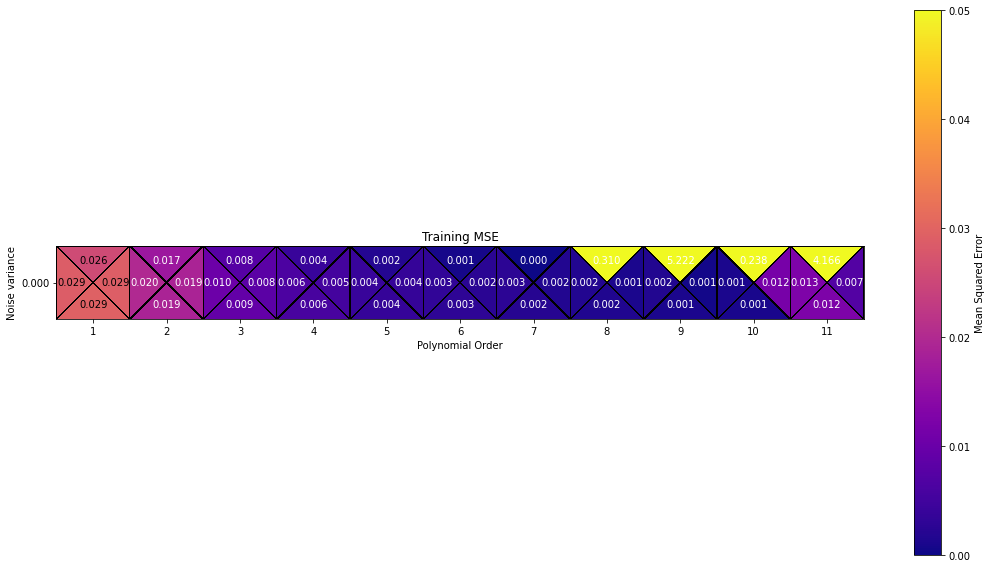

In [40]:
M = len(p)
N = len(noise)

# this plot is based on stackover flow answer by user JohanC to the question in the link 
# https://stackoverflow.com/questions/66048529/how-to-create-a-heatmap-where-each-cell-is-divided-into-4-triangles
def triangulation_for_triheatmap(M, N):
    xv, yv = np.meshgrid(np.arange(-0.5, M), np.arange(-0.5, N))  # vertices of the little squares
    xc, yc = np.meshgrid(np.arange(0, M), np.arange(0, N))  # centers of the little squares
    x = np.concatenate([xv.ravel(), xc.ravel()])
    y = np.concatenate([yv.ravel(), yc.ravel()])
    cstart = (M + 1) * (N + 1)  # indices of the centers

    trianglesN = [(i + j * (M + 1), i + 1 + j * (M + 1), cstart + i + j * M)
                  for j in range(N) for i in range(M)]
    trianglesE = [(i + 1 + j * (M + 1), i + 1 + (j + 1) * (M + 1), cstart + i + j * M)
                  for j in range(N) for i in range(M)]
    trianglesS = [(i + 1 + (j + 1) * (M + 1), i + (j + 1) * (M + 1), cstart + i + j * M)
                  for j in range(N) for i in range(M)]
    trianglesW = [(i + (j + 1) * (M + 1), i + j * (M + 1), cstart + i + j * M)
                  for j in range(N) for i in range(M)]
    return [Triangulation(x, y, triangles) for triangles in [trianglesN, trianglesE, trianglesS, trianglesW]]

values = [np.transpose(train_MSE_arr[:, 0, : , 0]), np.transpose(train_MSE_arr[:, 0, : , 1]),
          np.transpose(train_MSE_arr[:, 0, : , 2]), np.transpose(train_MSE_arr[:, 0, : , 3])]

triangul = triangulation_for_triheatmap(M, N)
cmaps = ['Blues','Blues','Blues','Blues']#['Blues', 'Greens', 'Purples', 'Reds']  # ['winter', 'spring', 'summer', 'autumn']
norms = [plt.Normalize(-0.5, 1) for _ in range(4)]
fig, ax = plt.subplots(figsize=(15,8))
#imgs = [ax.tripcolor(t, np.ravel(val), cmap=cmap, norm=norm, ec='white')
#        for t, val, cmap, norm in zip(triangul, values*100, cmaps, norms)]
imgs = [ax.tripcolor(t, val.ravel(), cmap='plasma', vmin=0, vmax=0.05, ec='k')
        for t, val in zip(triangul, (values))]
for val, dir in zip(values, [(-1, 0), (0, 1), (1, 0), (0, -1)]):
    for i in range(M):
        for j in range(N):
            v = val[j, i]
            ax.text(i + 0.3 * dir[1], j + 0.3 * dir[0], f'{v:.3f}', color='k' if 0.02 < v < 0.2 else 'w', ha='center', va='center')
ax.set_xticks(range(M))
ax.set_yticks(range(N))

def ymajor_tick(x, pos):
    return f"{x*0.025:.3f}"
def xmajor_tick(x, pos):
    return f"{x+1}"

ax.yaxis.set_major_locator(MultipleLocator(1.000))
# FuncFormatter is created and used automatically
ax.yaxis.set_major_formatter(ymajor_tick)

ax.xaxis.set_major_formatter(xmajor_tick)

ax.invert_yaxis()
ax.margins(x=0, y=0)
ax.set_xlabel("Polynomial Order")
ax.set_ylabel("Noise variance")

ax.set_aspect('equal', 'box')  # square cells
cbar = fig.colorbar(imgs[0], ax=ax, label = "Mean Squared Error")
ax.set_title("Training MSE")
plt.tight_layout()
plt.show()

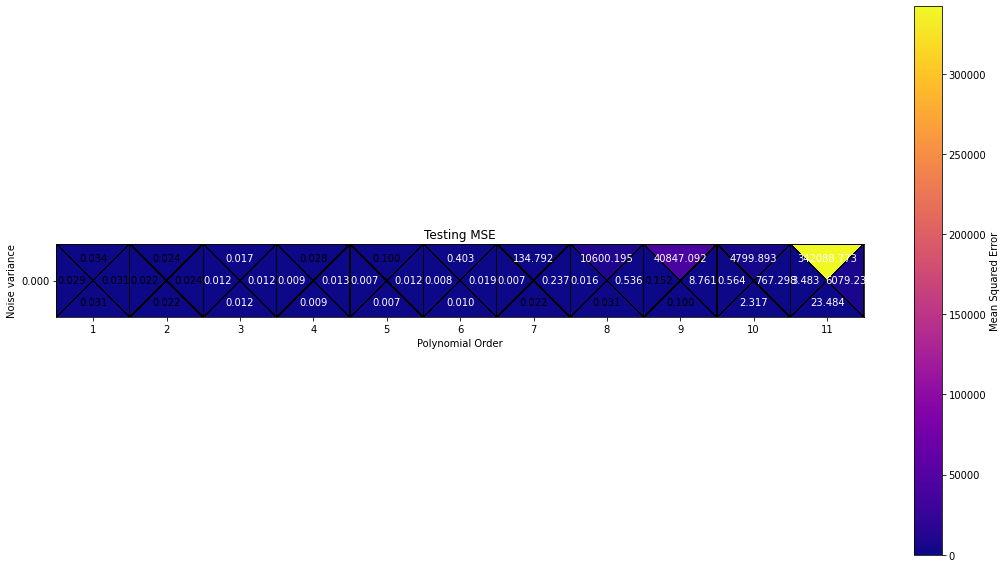

In [42]:
values = [np.transpose(test_MSE_arr[:, 0, : , 0]), np.transpose(test_MSE_arr[:, 0, : , 1]),
          np.transpose(test_MSE_arr[:, 0, : , 2]), np.transpose(test_MSE_arr[:, 0, : , 3])]

triangul = triangulation_for_triheatmap(M, N)
cmaps = ['Blues','Blues','Blues','Blues']#['Blues', 'Greens', 'Purples', 'Reds']  # ['winter', 'spring', 'summer', 'autumn']
norms = [plt.Normalize(-0.5, 1) for _ in range(4)]
fig, ax = plt.subplots(figsize=(15,8))
#imgs = [ax.tripcolor(t, np.ravel(val), cmap=cmap, norm=norm, ec='white')
#        for t, val, cmap, norm in zip(triangul, values*100, cmaps, norms)]
imgs = [ax.tripcolor(t, val.ravel(), cmap='plasma', vmin=0, vmax=np.max(np.max(values)), ec='k')
        for t, val in zip(triangul, (values))]
for val, dir in zip(values, [(-1, 0), (0, 1), (1, 0), (0, -1)]):
    for i in range(M):
        for j in range(N):
            v = val[j, i]
            ax.text(i + 0.3 * dir[1], j + 0.3 * dir[0], f'{v:.3f}', color='k' if 0.02 < v < 0.2 else 'w', ha='center', va='center')
ax.set_xticks(range(M))
ax.set_yticks(range(N))

def ymajor_tick(x, pos):
    return f"{x*0.025:.3f}"
def xmajor_tick(x, pos):
    return f"{x+1}"

ax.yaxis.set_major_locator(MultipleLocator(1.000))
# FuncFormatter is created and used automatically
ax.yaxis.set_major_formatter(ymajor_tick)

ax.xaxis.set_major_formatter(xmajor_tick)

ax.invert_yaxis()
ax.margins(x=0, y=0)
ax.set_xlabel("Polynomial Order")
ax.set_ylabel("Noise variance")

ax.set_aspect('equal', 'box')  # square cells
cbar = fig.colorbar(imgs[0], ax=ax, label = "Mean Squared Error")
ax.set_title("Testing MSE")
plt.tight_layout()
plt.show()


